In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [290]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [292]:
import warnings
warnings.filterwarnings("ignore")

In [294]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [296]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [298]:
nullfeats = [feats for feats in df if df[feats].isnull().sum() > 0]

In [300]:
nullfeats

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [302]:
for feats in nullfeats:
    print(feats, " % missing = ", round(df[feats].isnull().mean()*100,3))

Age  % missing =  4.624
TypeofContact  % missing =  0.511
DurationOfPitch  % missing =  5.135
NumberOfFollowups  % missing =  0.921
PreferredPropertyStar  % missing =  0.532
NumberOfTrips  % missing =  2.864
NumberOfChildrenVisiting  % missing =  1.35
MonthlyIncome  % missing =  4.767


In [304]:
len(df["Age"].unique())

45

In [306]:
for feats in nullfeats:
    if len(df[feats].unique())<6:
        print(feats, df[feats].unique())

TypeofContact ['Self Enquiry' 'Company Invited' nan]
PreferredPropertyStar [ 3.  4.  5. nan]
NumberOfChildrenVisiting [ 0.  2.  1. nan  3.]


In [308]:
df["Gender"].unique()
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [310]:
df["Gender"].replace("Fe Male","Female",inplace=True)
df["MaritalStatus"].replace("Unmarried","Single",inplace=True)

In [312]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [314]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [316]:
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [318]:
df.drop('CustomerID', inplace=True, axis=1)

In [320]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [322]:
numfeat = [feats for feats in df.columns if df[feats].dtype!="O"]
catfeat = [feats for feats in df.columns if df[feats].dtype=="O"]

In [324]:
numfeat.remove("ProdTaken")

In [352]:
numfeat

['Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [354]:
catfeat

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [356]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [358]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [360]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



In [362]:
preproc = ColumnTransformer(
[
("ohe",OneHotEncoder(drop='first'),catfeat),
("stscaler",StandardScaler(),numfeat)
]
    
)

In [364]:
preproc

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 ['TypeofContact', 'Occupation', 'Gender',
                                  'ProductPitched', 'MaritalStatus',
                                  'Designation']),
                                ('stscaler', StandardScaler(),
                                 ['Age', 'CityTier', 'DurationOfPitch',
                                  'NumberOfFollowups', 'PreferredPropertyStar',
                                  'NumberOfTrips', 'Passport',
                                  'PitchSatisfactionScore', 'OwnCar',
                                  'MonthlyIncome', 'TotalVisiting'])])

In [366]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 3995 to 860
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3910 non-null   float64
 1   TypeofContact           3910 non-null   object 
 2   CityTier                3910 non-null   int64  
 3   DurationOfPitch         3910 non-null   float64
 4   Occupation              3910 non-null   object 
 5   Gender                  3910 non-null   object 
 6   NumberOfFollowups       3910 non-null   float64
 7   ProductPitched          3910 non-null   object 
 8   PreferredPropertyStar   3910 non-null   float64
 9   MaritalStatus           3910 non-null   object 
 10  NumberOfTrips           3910 non-null   float64
 11  Passport                3910 non-null   int64  
 12  PitchSatisfactionScore  3910 non-null   int64  
 13  OwnCar                  3910 non-null   int64  
 14  Designation             3910 non-null   obj

In [368]:
X_train.columns

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [370]:
X_train_scaled = preproc.fit_transform(X_train)


In [372]:
X_test_scaled = preproc.transform(X_test)

In [374]:
X_train_scaled.shape

(3910, 26)

In [376]:
X_test_scaled.shape

(978, 26)

In [378]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=preproc.get_feature_names_out())

In [388]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=preproc.get_feature_names_out())

In [390]:
X_train_scaled

,ohe__TypeofContact_Self Enquiry,ohe__Occupation_Large Business,ohe__Occupation_Salaried,ohe__Occupation_Small Business,ohe__Gender_Male,ohe__ProductPitched_Deluxe,ohe__ProductPitched_King,ohe__ProductPitched_Standard,ohe__ProductPitched_Super Deluxe,ohe__MaritalStatus_Married,...,stscaler__CityTier,stscaler__DurationOfPitch,stscaler__NumberOfFollowups,stscaler__PreferredPropertyStar,stscaler__NumberOfTrips,stscaler__Passport,stscaler__PitchSatisfactionScore,stscaler__OwnCar,stscaler__MonthlyIncome,stscaler__TotalVisiting
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [392]:
column_name = preproc.get_feature_names_out()
column_name

array(['ohe__TypeofContact_Self Enquiry',
       'ohe__Occupation_Large Business', 'ohe__Occupation_Salaried',
       'ohe__Occupation_Small Business', 'ohe__Gender_Male',
       'ohe__ProductPitched_Deluxe', 'ohe__ProductPitched_King',
       'ohe__ProductPitched_Standard', 'ohe__ProductPitched_Super Deluxe',
       'ohe__MaritalStatus_Married', 'ohe__MaritalStatus_Single',
       'ohe__Designation_Executive', 'ohe__Designation_Manager',
       'ohe__Designation_Senior Manager', 'ohe__Designation_VP',
       'stscaler__Age', 'stscaler__CityTier', 'stscaler__DurationOfPitch',
       'stscaler__NumberOfFollowups', 'stscaler__PreferredPropertyStar',
       'stscaler__NumberOfTrips', 'stscaler__Passport',
       'stscaler__PitchSatisfactionScore', 'stscaler__OwnCar',
       'stscaler__MonthlyIncome', 'stscaler__TotalVisiting'], dtype=object)

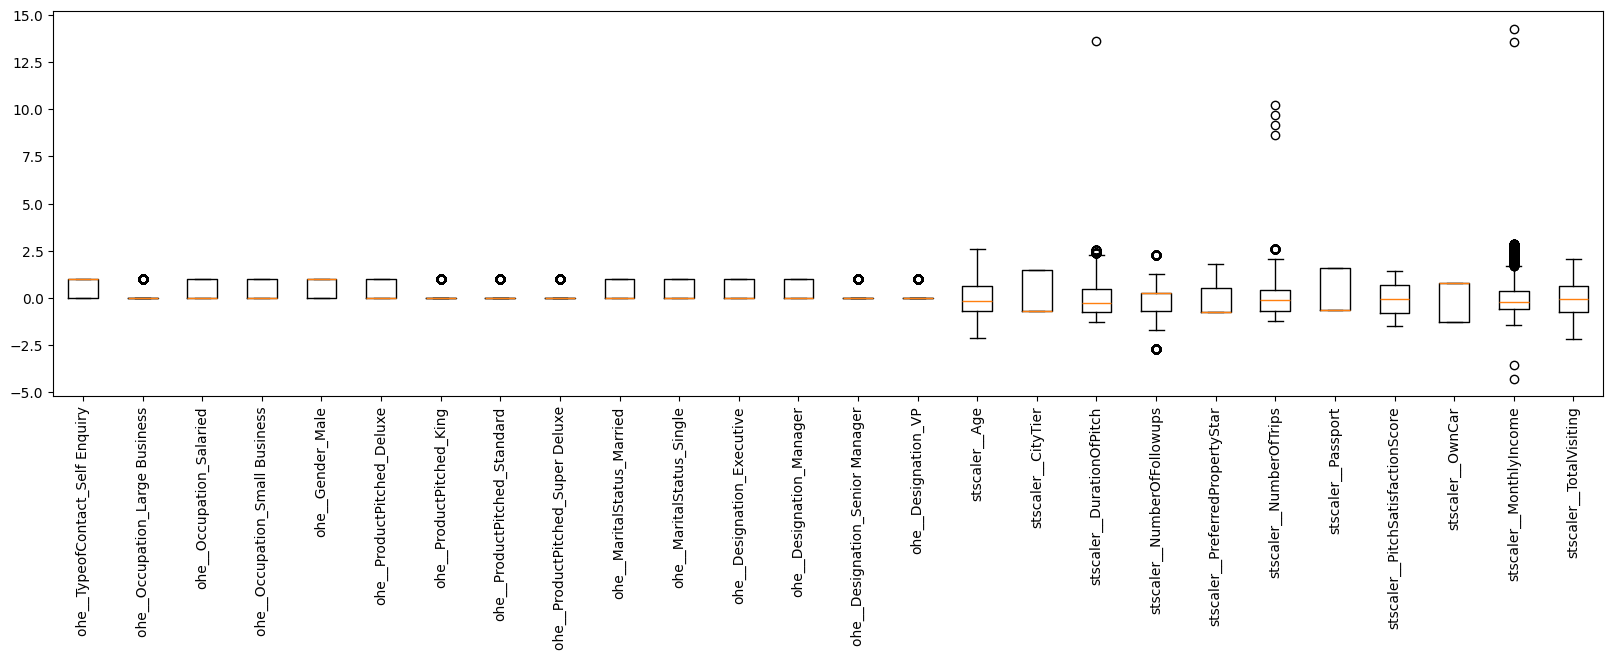

In [394]:
plt.figure(figsize=(20,5))
plt.boxplot(X_train_scaled)
plt.xticks(ticks=range(1, len(column_name) + 1), labels=column_name, rotation=90)
plt.show()

In [395]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [398]:
y_train
y_test

144     0
79      0
2098    0
4738    0
2858    1
       ..
2908    0
2059    1
4872    1
843     0
2572    0
Name: ProdTaken, Length: 978, dtype: int64

In [401]:
X_test_scaled.head()

,ohe__TypeofContact_Self Enquiry,ohe__Occupation_Large Business,ohe__Occupation_Salaried,ohe__Occupation_Small Business,ohe__Gender_Male,ohe__ProductPitched_Deluxe,ohe__ProductPitched_King,ohe__ProductPitched_Standard,ohe__ProductPitched_Super Deluxe,ohe__MaritalStatus_Married,...,stscaler__CityTier,stscaler__DurationOfPitch,stscaler__NumberOfFollowups,stscaler__PreferredPropertyStar,stscaler__NumberOfTrips,stscaler__Passport,stscaler__PitchSatisfactionScore,stscaler__OwnCar,stscaler__MonthlyIncome,stscaler__TotalVisiting
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382


In [403]:
X_train_scaled.columns

Index(['ohe__TypeofContact_Self Enquiry', 'ohe__Occupation_Large Business',
       'ohe__Occupation_Salaried', 'ohe__Occupation_Small Business',
       'ohe__Gender_Male', 'ohe__ProductPitched_Deluxe',
       'ohe__ProductPitched_King', 'ohe__ProductPitched_Standard',
       'ohe__ProductPitched_Super Deluxe', 'ohe__MaritalStatus_Married',
       'ohe__MaritalStatus_Single', 'ohe__Designation_Executive',
       'ohe__Designation_Manager', 'ohe__Designation_Senior Manager',
       'ohe__Designation_VP', 'stscaler__Age', 'stscaler__CityTier',
       'stscaler__DurationOfPitch', 'stscaler__NumberOfFollowups',
       'stscaler__PreferredPropertyStar', 'stscaler__NumberOfTrips',
       'stscaler__Passport', 'stscaler__PitchSatisfactionScore',
       'stscaler__OwnCar', 'stscaler__MonthlyIncome',
       'stscaler__TotalVisiting'],
      dtype='object')

In [405]:
X_test_scaled.columns

Index(['ohe__TypeofContact_Self Enquiry', 'ohe__Occupation_Large Business',
       'ohe__Occupation_Salaried', 'ohe__Occupation_Small Business',
       'ohe__Gender_Male', 'ohe__ProductPitched_Deluxe',
       'ohe__ProductPitched_King', 'ohe__ProductPitched_Standard',
       'ohe__ProductPitched_Super Deluxe', 'ohe__MaritalStatus_Married',
       'ohe__MaritalStatus_Single', 'ohe__Designation_Executive',
       'ohe__Designation_Manager', 'ohe__Designation_Senior Manager',
       'ohe__Designation_VP', 'stscaler__Age', 'stscaler__CityTier',
       'stscaler__DurationOfPitch', 'stscaler__NumberOfFollowups',
       'stscaler__PreferredPropertyStar', 'stscaler__NumberOfTrips',
       'stscaler__Passport', 'stscaler__PitchSatisfactionScore',
       'stscaler__OwnCar', 'stscaler__MonthlyIncome',
       'stscaler__TotalVisiting'],
      dtype='object')

In [412]:
model_dict = {"RFC":RandomForestClassifier(), "GBC":GradientBoostingClassifier(), "ABC":AdaBoostClassifier(), 
              "DTC":DecisionTreeClassifier(),"LR":LogisticRegression()}

results = {"Model":[],"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[],"roc_auc_score":[]};

for name,model in model_dict.items():
    model.fit(X=X_train_scaled,y=y_train)
    
    pred=model.predict(X_test_scaled)
    results["Model"].append(name)
    results["accuracy_score"].append(accuracy_score(pred,y_test))
    results["precision_score"].append(precision_score(pred,y_test))
    results["recall_score"].append(recall_score(pred,y_test))
    results["f1_score"].append(f1_score(pred,y_test))
    results["roc_auc_score"].append(roc_auc_score(pred,y_test))
    
    

In [422]:
results_df = pd.DataFrame(results)



In [424]:
results_df

,Model,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,RFC,0.928425,0.654450,0.968992,0.781250,0.945627
1,GBC,0.858896,0.392670,0.773196,0.520833,0.820764
2,ABC,0.835378,0.319372,0.663043,0.431095,0.758158
3,DTC,0.919223,0.753927,0.818182,0.784741,0.879789
4,LR,0.835378,0.293194,0.682927,0.410256,0.766129


# Hyperparam Training

In [ ]:
ab = AdaBoostClassifier()

In [434]:

rf_params = {"max_depth" : [5,8,15,None,10],
"max_features" : [5,7,8, "auto"],"min_samples_split":[2, 8, 15, 20],"n_estimators": [100, 200, 500, 1000]}

adaboost_params = {"n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']}
             

In [436]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 8, 'auto'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [438]:
adaboost_params

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [440]:
#Hyperparam Tuning

randomcv_models = [
("RFTune",RandomForestClassifier(),rf_params),
("ABTune",AdaBoostClassifier(),adaboost_params)
]

In [442]:
randomcv_models

[('RFTune',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 8, 'auto'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('ABTune',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [444]:
from sklearn.model_selection import RandomizedSearchCV


In [448]:

modelparams = {}

for name, model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,param_distributions=params,n_iter=100,verbose=True,n_jobs = -1,cv=3)
    random.fit(X_train_scaled,y_train)
    modelparams[name]=random.best_params_

for model_name in modelparams:
    print(f" Best Params for {model_name} is :")
    print(modelparams[model_name])
    
    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best Params for RFTune is :
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
 Best Params for ABTune is :
{'n_estimators': 80, 'algorithm': 'SAMME'}


In [454]:
model_dict = {"RFC":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= 15), 
              "ABC":AdaBoostClassifier(n_estimators= 80, algorithm='SAMME')}

#results_new = {"Model":[],"accuracy_score":[],"precision_score":[],"recall_score":[],"f1_score":[],"roc_auc_score":[]};

for name,model in model_dict.items():
    model.fit(X=X_train_scaled,y=y_train)
    
    pred=model.predict(X_test_scaled)
    results["Model"].append(name)
    results["accuracy_score"].append(accuracy_score(pred,y_test))
    results["precision_score"].append(precision_score(pred,y_test))
    results["recall_score"].append(recall_score(pred,y_test))
    results["f1_score"].append(f1_score(pred,y_test))
    results["roc_auc_score"].append(roc_auc_score(pred,y_test))
    
    

In [456]:
results_df = pd.DataFrame(results)

results_df

,Model,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,RFC,0.928425,0.654450,0.968992,0.781250,0.945627
1,GBC,0.858896,0.392670,0.773196,0.520833,0.820764
2,ABC,0.835378,0.319372,0.663043,0.431095,0.758158
3,DTC,0.919223,0.753927,0.818182,0.784741,0.879789
4,LR,0.835378,0.293194,0.682927,0.410256,0.766129
5,RFC,0.932515,0.680628,0.962963,0.797546,0.945301
6,ABC,0.836401,0.225131,0.781818,0.349593,0.810736
